<a href="https://colab.research.google.com/github/ishara-bangkit-capstone-project/ishara-machine-learning/blob/main/fix/notebooks/model_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and Import Libraries

In [ ]:
!pip install tflite-support

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 23.7 MB/s eta 0:00:00


In [ ]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image
%matplotlib inline

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import load_model

# System libraries
from pathlib import Path
import matplotlib.image as mpimg
import zipfile, os, shutil
import seaborn as sn

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import flatbuffers
import platform
from tensorflow_lite_support.metadata import metadata_schema_py_generated as _metadata_fb
from tensorflow_lite_support.metadata import schema_py_generated
from tensorflow_lite_support.metadata.python import metadata as _metadata
from tensorflow_lite_support.metadata.python import metadata_writers

# Import Drive

In [ ]:
from google.colab import drive, files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load Model

In [ ]:
# Configurations
binary_model = load_model('/content/gdrive/MyDrive/ISHARA/savemodels (1)/binary_model/binary_model.h5') # Replace with the path to your binary dataset
multiclass_model = load_model('/content/gdrive/MyDrive/ISHARA/savemodels (1)/multiclass_model/multiclass_model.h5') # Replace with the path to your multiclass dataset
target_size = (224, 224)
batch_size = 32
epochs = 10

# Load TFLite models
binary_interpreter = tf.lite.Interpreter(model_path='/content/gdrive/MyDrive/ISHARA/savemodels (1)/binary_model/binary_model.tflite')
binary_interpreter.allocate_tensors()
multiclass_interpreter = tf.lite.Interpreter(model_path='/content/gdrive/MyDrive/ISHARA/savemodels (1)/multiclass_model/multiclass_model.tflite')
multiclass_interpreter.allocate_tensors()

# Inference Phase
def load_and_preprocess_image(image_path, target_size):
  img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = np.expand_dims(img, axis=0) / 255.0
  return img

def predict_image(binary_interpreter, multiclass_interpreter, image_path):
  img = load_and_preprocess_image(image_path, target_size = (224, 224))

  # Predict using the binary model
  input_details = binary_interpreter.get_input_details()
  output_details = binary_interpreter.get_output_details()
  binary_interpreter.resize_tensor_input(input_details[0]['index'], (1, 224, 224, 3))
  binary_interpreter.allocate_tensors()
  binary_interpreter.set_tensor(input_details[0]['index'], img)
  binary_interpreter.invoke()
  binary_prediction = binary_interpreter.get_tensor(output_details[0]['index'])

  if binary_prediction[0] > 0.5:
    print("No hand detected.")
    return "No hand detected."
  else:
    # Predict using the multiclass model
    input_details = multiclass_interpreter.get_input_details()
    output_details = multiclass_interpreter.get_output_details()
    multiclass_interpreter.resize_tensor_input(input_details[0]['index'], (1, 224, 224, 3))
    multiclass_interpreter.allocate_tensors()
    multiclass_interpreter.set_tensor(input_details[0]['index'], img)
    multiclass_interpreter.invoke()
    multiclass_prediction = multiclass_interpreter.get_tensor(output_details[0]['index'])
    predicted_class = np.argmax(multiclass_prediction, axis=1)
    print(f"Hand detected. Predicted sign language letter: {chr(65 + predicted_class[0])}")
    return chr(65 + predicted_class[0])

# Upload Files for Model Inference

Saving iniB.jpg to iniB.jpg
Saving iniN.jpg to iniN.jpg
Saving notfound1.jpg to notfound1.jpg
Saving notfound2.jpg to notfound2.jpg


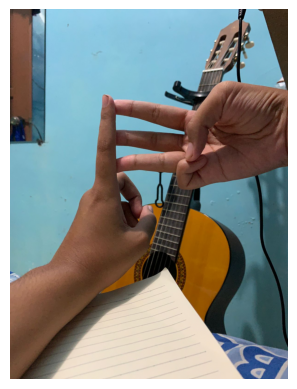

Hand detected. Predicted sign language letter: B
iniB.jpg: B


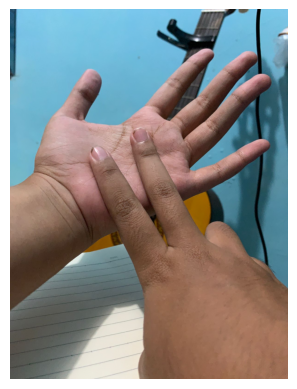

Hand detected. Predicted sign language letter: N
iniN.jpg: N


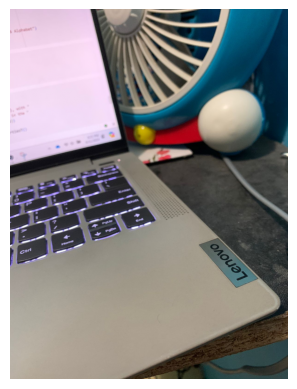

No hand detected.
notfound1.jpg: No hand detected.


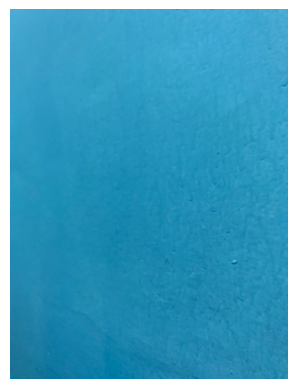

No hand detected.
notfound2.jpg: No hand detected.


In [ ]:
# Upload and predict images
uploaded = files.upload()
for fn in uploaded.keys():
  plt.figure()
  plt.imshow(plt.imread(fn) / 255.)
  plt.axis("off")
  plt.show()

  result = predict_image(binary_interpreter, multiclass_interpreter, fn)
  print(f"{fn}: {result}")

Saving 1_I.jpg to 1_I (1).jpg
Saving 2_S.jpg to 2_S (1).jpg
Saving 3_H.jpg to 3_H (1).jpg
Saving 4_A.jpg to 4_A (1).jpg
Saving 5_R.jpg to 5_R (1).jpg
Saving 6_A.jpg to 6_A (1).jpg


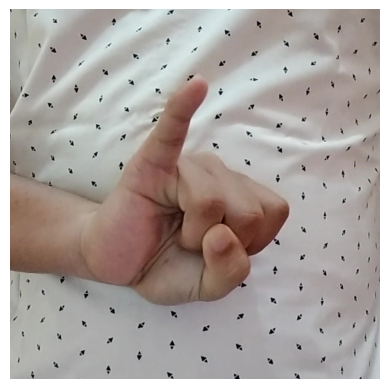

Hand detected. Predicted sign language letter: I
1_I (1).jpg: I


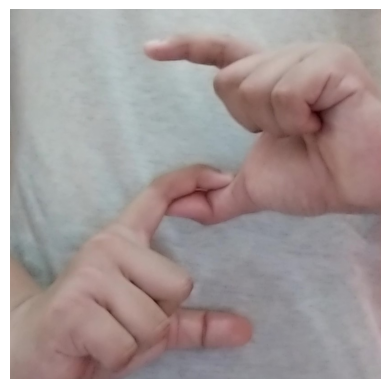

Hand detected. Predicted sign language letter: S
2_S (1).jpg: S


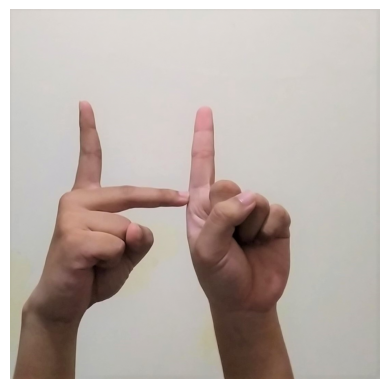

Hand detected. Predicted sign language letter: H
3_H (1).jpg: H


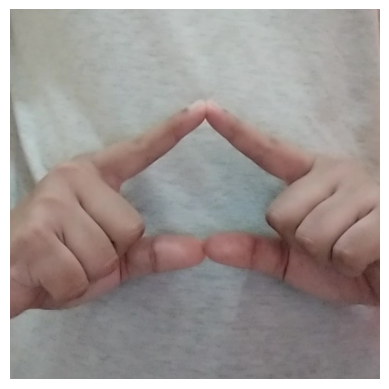

Hand detected. Predicted sign language letter: A
4_A (1).jpg: A


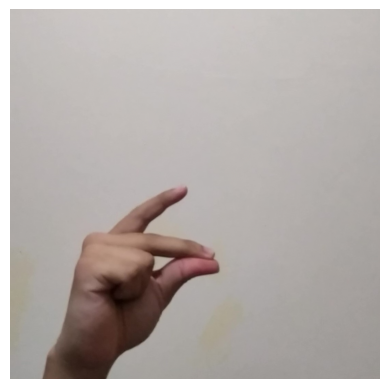

Hand detected. Predicted sign language letter: R
5_R (1).jpg: R


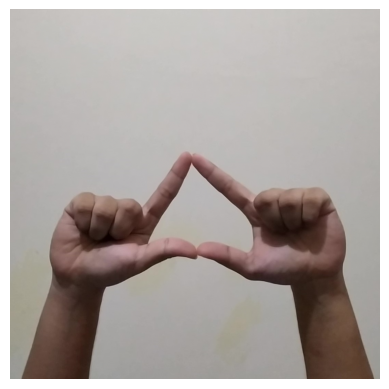

Hand detected. Predicted sign language letter: A
6_A (1).jpg: A


In [ ]:
# Upload and predict images
uploaded = files.upload()
for fn in uploaded.keys():
  plt.figure()
  plt.imshow(plt.imread(fn) / 255.)
  plt.axis("off")
  plt.show()

  result = predict_image(binary_interpreter, multiclass_interpreter, fn)
  print(f"{fn}: {result}")